**INCISO A**



Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).
Columna: Employee_ID
  Percentil 25: EMP1250
  Percentil 50 (Mediana): EMP2500
  Percentil 75: EMP3750
  Cuartiles (Q1, Q2, Q3): EMP1250, EMP2500, EMP3750

Columna: Age
  Percentil 25: 31.0
  Percentil 50 (Mediana): 41.0
  Percentil 75: 51.0
  Cuartiles (Q1, Q2, Q3): 31.0, 41.0, 51.0

Columna: Gender
  Percentil 25: Female
  Percentil 50 (Mediana): Male
  Percentil 75: Non-binary
  Cuartiles (Q1, Q2, Q3): Female, Male, Non-binary

Columna: Job_Role
  Percentil 25: Designer
  Percentil 50 (Mediana): Marketing
  Percentil 75: Sales
  Cuartiles (Q1, Q2, Q3): Designer, Marketing, Sales

Columna: Industry
  Percentil 25: Education
  Percentil 50 (Mediana): Healthcare
  Percentil 75: Manufacturing
  Cuartiles (Q1, Q2, Q3): Education, Healthcare, Manufacturing

Columna: Years_of_Experience
  Percentil 25: 9.0
  Percentil 50 (Mediana): 18.0
  Percentil 75: 26.0
  Cua

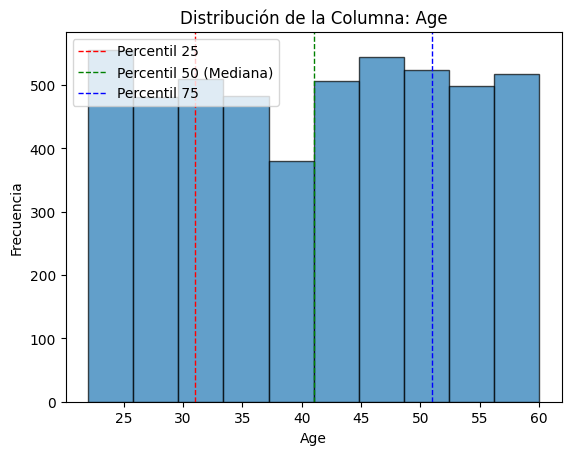

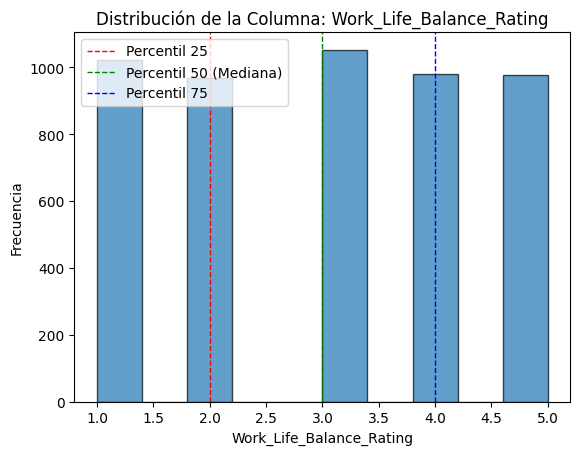

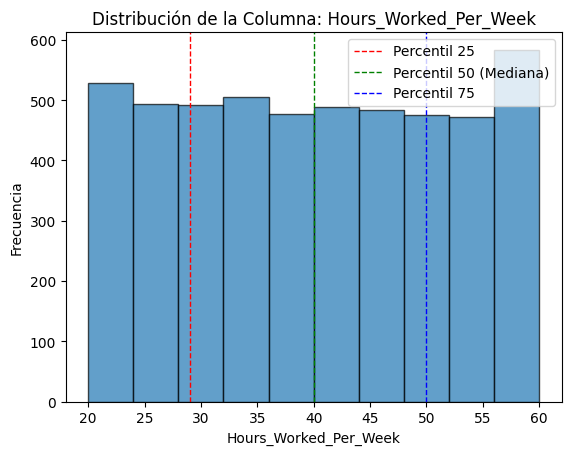

In [32]:
# Montar Google Drive
from google.colab import drive
drive.mount("/content/Drive")

# Cargar el dataset
import pandas as pd
data = pd.read_csv("/content/Drive/MyDrive/datos/trabajoremoto.csv")

# Función para calcular el percentil manualmente
def calcular_percentil(datos, percentil):
    datos_ordenados = sorted(datos)
    k = (len(datos) - 1) * percentil / 100
    f = int(k)
    c = k - f
    if f + 1 < len(datos):
        # Check if the data type is numeric
        if isinstance(datos_ordenados[f], (int, float)) and isinstance(datos_ordenados[f+1], (int, float)):
            return datos_ordenados[f] + (c * (datos_ordenados[f + 1] - datos_ordenados[f]))
        else:
            return datos_ordenados[f] # Return the value if not numeric
    else:
        return datos_ordenados[f]

# Función para calcular cuartiles
def calcular_cuartiles(datos):
    q1 = calcular_percentil(datos, 25)
    q2 = calcular_percentil(datos, 50)
    q3 = calcular_percentil(datos, 75)
    return q1, q2, q3

# Calcular y mostrar percentiles y cuartiles para cada columna
for columna in data.columns:
    valores = data[columna].dropna().tolist()  # Convertir a lista, eliminando NaN
    percentil_25 = calcular_percentil(valores, 25)
    percentil_50 = calcular_percentil(valores, 50)
    percentil_75 = calcular_percentil(valores, 75)
    q1, q2, q3 = calcular_cuartiles(valores)
    print(f"Columna: {columna}")
    print(f"  Percentil 25: {percentil_25}")
    print(f"  Percentil 50 (Mediana): {percentil_50}")
    print(f"  Percentil 75: {percentil_75}")
    print(f"  Cuartiles (Q1, Q2, Q3): {q1}, {q2}, {q3}\n")

# Graficar distribuciones de columnas seleccionadas
import matplotlib.pyplot as plt

columnas_a_graficar = ['Age','Work_Life_Balance_Rating','Hours_Worked_Per_Week']  # Cambia a las columnas que desees
for columna in columnas_a_graficar:
    valores = data[columna].dropna().tolist()  # Convertir a lista, eliminando NaN
    plt.hist(valores, bins=10, alpha=0.7, edgecolor="black")
    plt.axvline(calcular_percentil(valores, 25), color='red', linestyle='dashed', linewidth=1, label="Percentil 25")
    plt.axvline(calcular_percentil(valores, 50), color='green', linestyle='dashed', linewidth=1, label="Percentil 50 (Mediana)")
    plt.axvline(calcular_percentil(valores, 75), color='blue', linestyle='dashed', linewidth=1, label="Percentil 75")
    plt.title(f"Distribución de la Columna: {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()


**INCISO B**

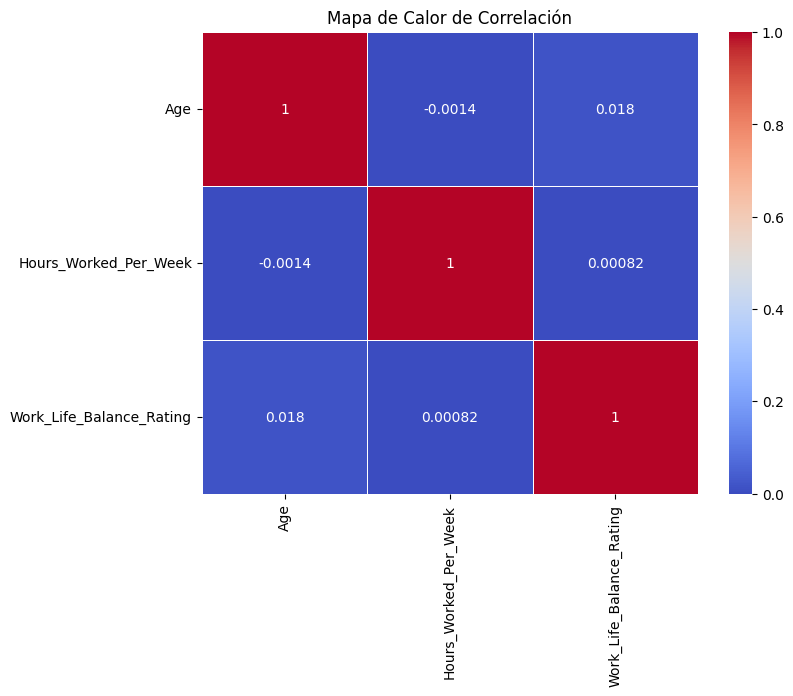

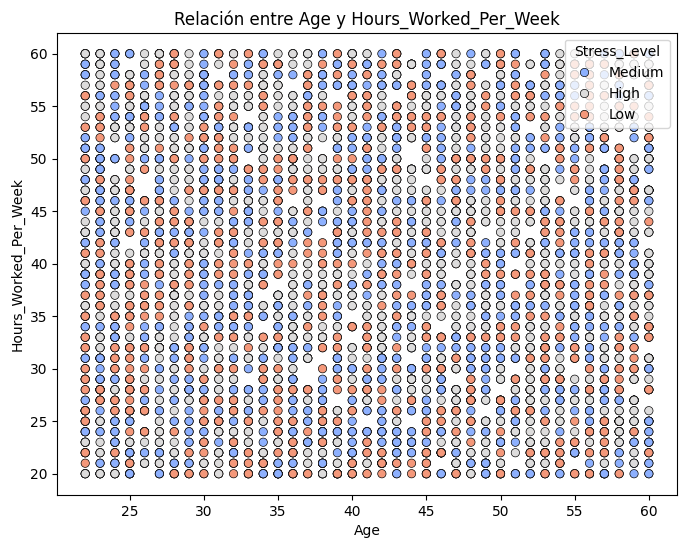

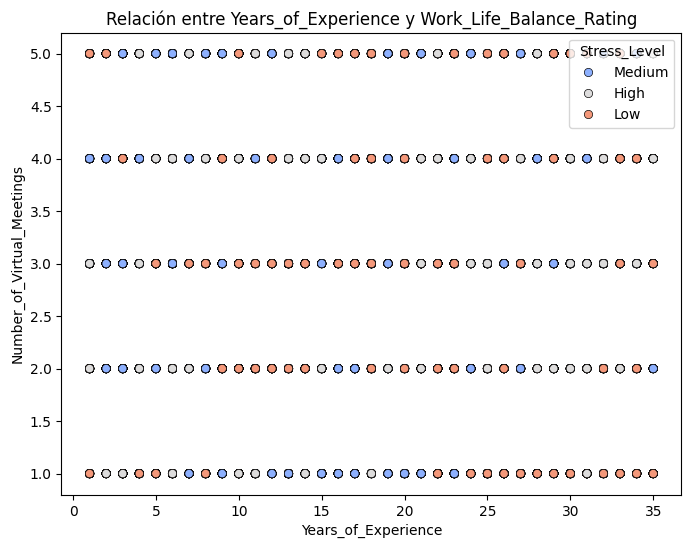

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para ver la correlación entre las columnas seleccionadas
columnas = ['Age','Hours_Worked_Per_Week','Work_Life_Balance_Rating']
corr = data[columnas].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

# Gráfica de dispersión para analizar la relación entre Age', y'Hours_Worked_Per_Week
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Hours_Worked_Per_Week', data=data, hue='Stress_Level', palette='coolwarm', edgecolor='black')
plt.title("Relación entre Age y Hours_Worked_Per_Week")
plt.xlabel("Age")
plt.ylabel("Hours_Worked_Per_Week")
plt.show()

# Gráfica de dispersión para analizar la relación entre'Years_of_Experience', y'Company_Support_for_Remote_Work'
plt.figure(figsize=(8,6))
sns.scatterplot(x='Years_of_Experience', y='Work_Life_Balance_Rating', data=data, hue='Stress_Level', palette='coolwarm', edgecolor='black')
plt.title("Relación entre Years_of_Experience y Work_Life_Balance_Rating")
plt.xlabel("Years_of_Experience")
plt.ylabel("Number_of_Virtual_Meetings")
plt.show()


**INCISO C**

Columna: Age
  Media: 40.995
  Mediana: 41.0
  Moda: 53

Columna: Work_Life_Balance_Rating
  Media: 2.9842
  Mediana: 3.0
  Moda: 3

Columna: Hours_Worked_Per_Week
  Media: 39.6146
  Mediana: 40.0
  Moda: 28



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

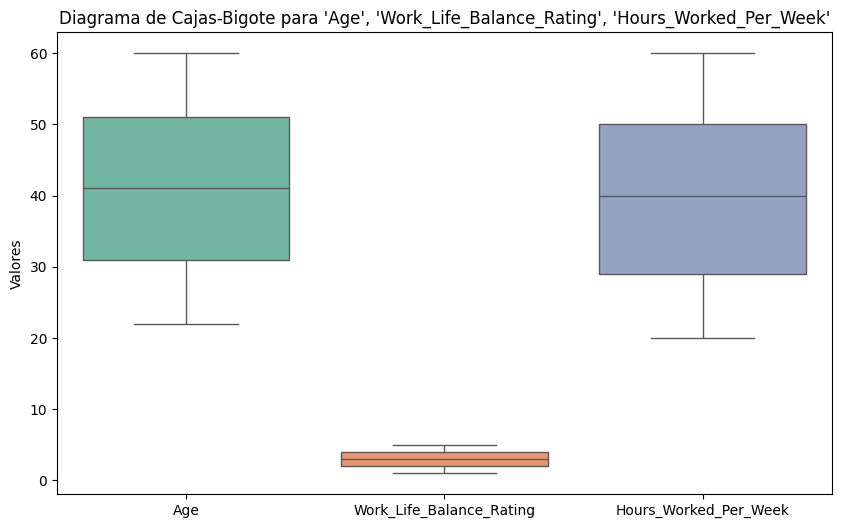

In [35]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calcular media, mediana y moda para las columnas seleccionadas
columnas_seleccionadas = ['Age', 'Work_Life_Balance_Rating', 'Hours_Worked_Per_Week']

for columna in columnas_seleccionadas:
    media = data[columna].mean()
    mediana = data[columna].median()
    moda = data[columna].mode()[0]  # Obteniendo la primera moda en caso de múltiples modas
    print(f"Columna: {columna}")
    print(f"  Media: {media}")
    print(f"  Mediana: {mediana}")
    print(f"  Moda: {moda}\n")

# Crear el diagrama de cajas-bigote (boxplot) para las columnas seleccionadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[columnas_seleccionadas], palette="Set2")
plt.title("Diagrama de Cajas-Bigote para 'Age', 'Work_Life_Balance_Rating', 'Hours_Worked_Per_Week'")
plt.ylabel("Valores")
plt.show()
